<a href="https://colab.research.google.com/github/Pedro4010/carnawari/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regressão é quase amor

Otimizando as vendas de cerveja no Carnaval 2022.

###### Podemos comparar as quantidades de cerveja consumidas no Brasil em certas datas com a Rep. Tcheca, o maior consumidor de cerveja por 23 anos consecutivos. 

##### Usando os dados que temos, fazer uma regressão que vai indicar a quantidade de cervejas vendidas.
1.   Dados de entrada: temperatura, clima, etc
2.   Encontrar a previsão para os dias atuais em lugares de São Paulo
3.   Encontrar a maior saída da equação 





In [1]:
# Conectando ao google drive e tendo o primeiro contato com o DataSet

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/googlecolab/consumo_cerveja.csv')

In [4]:
dataset

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [7]:
dataset.shape

(941, 7)

In [8]:
# Como tratar os valores nulos desse dataset ? Temos 1 ano completo de registros com todas as colunas preenchidas.
# Porém há muitos valores NaN.
print(dataset.isna().sum())

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64


### Tratando o dataset

In [9]:
df = dataset.dropna()

In [10]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [11]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [12]:
# Trocar as vírgulas por pontos.

#Por que esse retorno quando executa essa célula ?

df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',','.')
df['Temperatura Minima (C)']= df['Temperatura Minima (C)'].str.replace(',','.')
df['Temperatura Maxima (C)']= df['Temperatura Maxima (C)'].str.replace(',','.')
df['Precipitacao (mm)']= df['Precipitacao (mm)'].str.replace(',','.')

In [13]:
# Transformar a coluna Data para datetime.
# Por que esse retorno ?

df['Data'] = pd.to_datetime(df['Data'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [15]:
# Transformar de objeto para float, se não dá erro na correlação e só aparecem os valores float.

transf = ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']
df[transf] = df[transf].astype('float')



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


### Primeiros insights do DataSet.
Após alguns tratamentos, conseguimos finalmente olhar para a correlação no dataset, o que será essencial para tirarmos os primeiros insights sobre como as variáveis estão se comportando. 


In [17]:
# Fazendo a correlação das variáveis para ver se há alguma ligação entre elas.
# Podemos ver que a maior correlação com o consumo de cerveja é da temperatura máxima e do final de semana.
# Com isso sabemos que quanto mais quente, e aos finais de semana, o consumo de cerveja tende a ser maior.

df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


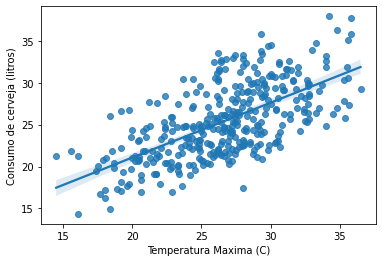

In [18]:
# Regression Plot

sns.regplot(x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)', data=df)
plt.show()

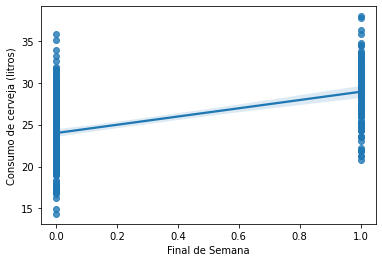

In [19]:
sns.regplot(x='Final de Semana', y='Consumo de cerveja (litros)', data=df)
plt.show()

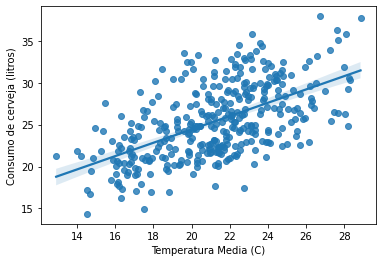

In [20]:
sns.regplot(x='Temperatura Media (C)', y='Consumo de cerveja (litros)', data=df)
plt.show()

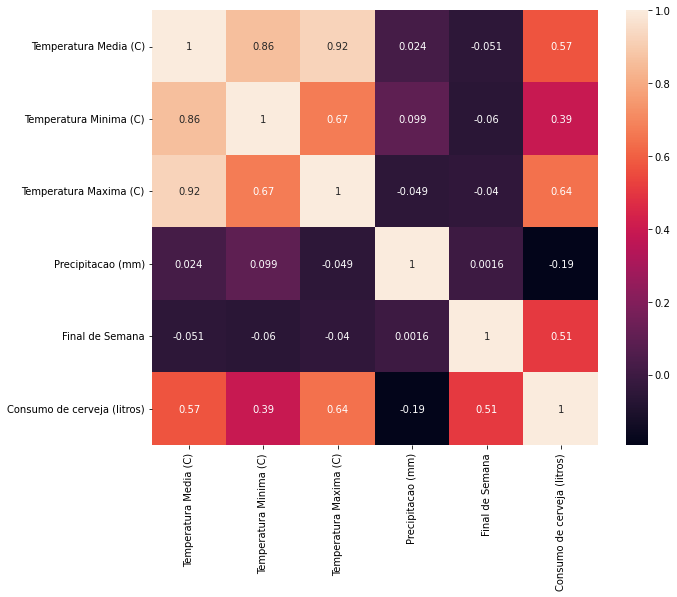

In [21]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Regressão

In [22]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [23]:
# X = Variáveis preditoras
# Y = Variáveis que serão previstas

X = df[['Temperatura Maxima (C)']] 
Y = df[['Consumo de cerveja (litros)']]

In [24]:
# Encontrando a saída da equação para a regressão linear.

# y_previsto = intercepto + coef * X

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [25]:
lm.intercept_

array([7.97493938])

In [26]:
lm.coef_

array([[0.65484558]])

In [27]:
df['Consumo Previsto'] = 7.97 + 0.65 * df['Temperatura Maxima (C)']

In [28]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consumo Previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,29.095
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,29.745
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,27.405
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,26.560
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,26.365


In [29]:
# Pensando nos 4 dias propostos a venda de cerveja. 27/02/2022, 28/02/2022, 01/03/2022, 02/03/2022
# Primeiro vamos olhar como foram esses 4 dias no ano de 2015.

df_diasdevenda = df.loc[(df['Data']> '2015-02-26') & (df['Data'] < '2015-03-03')]
df_diasdevenda                                                   

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consumo Previsto
57,2015-02-27,24.64,20.4,31.4,0.6,0.0,26.241,28.380
58,2015-02-28,22.40,19.7,27.7,0.0,1.0,26.467,25.975
59,2015-03-01,21.26,18.2,26.3,3.0,1.0,27.475,25.065
60,2015-03-02,22.16,17.2,29.2,0.0,0.0,28.749,26.950


In [30]:
y_hat = lm.predict(X)

In [ ]:
y_hat

In [32]:
# Coeficiente de determinação: quão próximo os dados estão da linha.
# Um score de 0.41 indica que o modelo explica em aproxidamente 40% da variância da variável dependente a partir dos regressores(independentes).

lm.score(X,Y)

0.413027909953363

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mae = mean_absolute_error(df['Consumo de cerveja (litros)'],y_hat)

In [35]:
print('O erro médio absoluto é:', mae)

O erro médio absoluto é: 2.7642672738837044


In [36]:
# Explorando mais os dias 
#27/02/2022 - Temperatura máxima - 29, Temperatura mínima - 19, Temperatura média - 22, Precipitação 0mm - Domingo 
#28/02/2022 - Temperatura máxima - 32, Temperatura mínima - 21, Temperatura média - 25, Precipitação 0mm - Segunda 
#01/03/2022 - Temperatura máxima - 30, Temperatura mínima - 18, Temperatura média - 24, Precipitação 0mm - Terça
#02/03/2022 - Temperatura máxima - 30, Temperatura mínima - 20, Temperatura média - 23, Precipitação 0mm - Quarta

# Os dados foram extraídos do seguinte endereço: https://www.tempo.com/sao-paulo-sactual.htm#:~:text=Temperatura%20M%C3%ADnima%2019%20%C2%B0C,Press%C3%A3o%20m%C3%A1xima%201022%20hPa

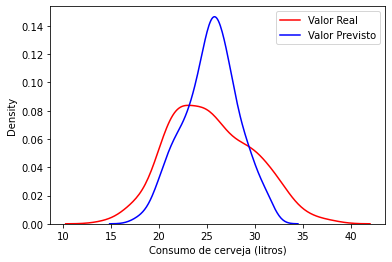

In [37]:
ax1 = sns.distplot(df['Consumo de cerveja (litros)'],hist = False, color='r', label='Valor Real')
sns.distplot(y_hat, hist=False, ax=ax1, color='b', label = 'Valor Previsto')
plt.legend()
plt.show()

### Regressão Linear Múltipla

In [39]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consumo Previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,29.095
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,29.745
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,27.405
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,26.560
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,26.365


In [41]:
lm = LinearRegression()
lm
X = df[['Temperatura Maxima (C)', 'Final de Semana']]
Y = df[['Consumo de cerveja (litros)']]
lm.fit(X,Y)

LinearRegression()

In [43]:
lm.intercept_

array([5.91612267])

In [42]:
lm.coef_

array([[0.67669811, 5.18471259]])

In [45]:
cons_previsto = 5.91 + 0.67 * df['Temperatura Maxima (C)'] + 5.18 * df['Final de Semana']

In [46]:
cons_previsto

0      27.685
1      28.355
2      31.123
3      30.252
4      24.871
        ...  
360    29.984
361    23.799
362    22.057
363    20.918
364    25.340
Length: 365, dtype: float64

In [47]:
y_hat = lm.predict(X)

In [48]:
print('Score R²: ', lm.score(X,Y))
mae = mean_absolute_error(df['Consumo de cerveja (litros)'],y_hat)
print('O erro médio absoluto é:', mae)

Score R²:  0.6963552106338191
O erro médio absoluto é: 2.009239861340462


##### Podemos ver que com duas variáveis preditoras com uma correlação positiva, a regressão se ajusta melhor e seu erro médio absoluto diminui.
Por motivos de estudo, vou fazer a Regressão múltipla também com a variável de temperatura média. 

In [49]:
lm = LinearRegression()
lm
X = df[['Temperatura Maxima (C)', 'Final de Semana', 'Temperatura Media (C)']]
Y = df[['Consumo de cerveja (litros)']]
lm.fit(X,Y)

LinearRegression()

In [50]:
lm.intercept_

array([6.24094898])

In [51]:
lm.coef_

array([[ 0.74602654,  5.17488239, -0.10208814]])

In [55]:
cons_previsto2 = 6.24 + 0.74 * df['Temperatura Maxima (C)'] + 5.17 * df['Final de Semana'] - 0.1 * df['Temperatura Media (C)']

In [56]:
cons_previsto2

0      27.560
1      28.328
2      31.054
3      30.176
4      24.800
        ...  
360    29.878
361    23.734
362    21.906
363    20.678
364    25.224
Length: 365, dtype: float64

In [57]:
y_hat = lm.predict(X)

In [58]:
print('Score R²: ', lm.score(X,Y))
mae = mean_absolute_error(df['Consumo de cerveja (litros)'],y_hat)
print('O erro médio absoluto é:', mae)

Score R²:  0.6971655189990148
O erro médio absoluto é: 1.9997585772252502


##### O score e o  erro com três variáveis preditoras acabou sendo praticamente o mesmo que com duas. Podem ocorrer problemas ao usarmos duas variáveis que tem forte correlação, como vemos na Temperatura Máxima e Temperatura Média, porém como é uma fonte de estudo, vamos deixar ambos os casos.

##### Gráfico de resíduos

Text(0, 0.5, 'Erro')

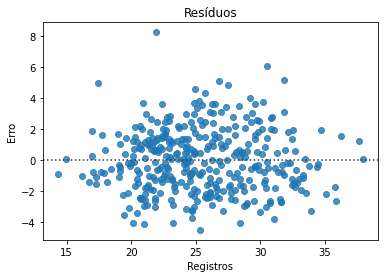

In [60]:
sns.residplot(df['Consumo de cerveja (litros)'], y_hat)
plt.title('Resíduos')
plt.xlabel('Registros')
plt.ylabel('Erro')

##### Quando olhamos para um gráfico de resíduos, queremos que ele mostre o que errramos, e assumimos que erramos o que é aleatório. Neste exemplo temos alguns erros não aleatórios, o que indica que podemos melhorar nossa análise em alguns pontos. 

##### Podemos olhar também para a Regressão Polinomial, para ver se ajusta melhor aos dados.

In [61]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Consumo Previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,29.095
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,29.745
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,27.405
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,26.560
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,26.365


In [63]:
X = df['Temperatura Maxima (C)']
Y = df['Consumo de cerveja (litros)']

In [77]:
f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p)

           3          2
-0.001202 x + 0.0949 x - 1.783 x + 28.3


In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
pf = PolynomialFeatures(degree=2)
pf

PolynomialFeatures()

In [75]:
x_pol = pf.fit_transform(X)

ValueError: ignored

In [ ]:
lm = LinearRegression()
lm.fit(X_new,Y)